In [1]:
import sys, os
sys.path.append(os.path.abspath('../..'))

In [2]:
import torch
import torch.optim as optim
import gym
from torch.utils.tensorboard import SummaryWriter
from itertools import count
import matplotlib.pyplot as plt
from IPython import display
from collections import deque


from networks.dqn_atari import DQN
from utils.memory import ReplayMemory
from utils.optimization import standard_optimization
from environments.atari_wrappers import make_atari, wrap_deepmind
from utils.atari_utils import fp, ActionSelector, evaluate

In [3]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % (env, step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

In [4]:
env_name = 'Breakout'
env_raw = make_atari('{}NoFrameskip-v4'.format(env_name))
env = wrap_deepmind(env_raw, frame_stack=False, episode_life=False, clip_rewards=True)
c,h,w = c,h,w = fp(env.reset()).shape
n_actions = env.action_space.n

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # if gpu is to be used
policy_net = DQN(n_actions=n_actions).to(device)
policy_net = torch.load("models/dqn_expert_breakout_model")

In [6]:
action_selector = ActionSelector(0, 0, policy_net, 1, n_actions, device)

In [7]:
q = deque(maxlen=5)

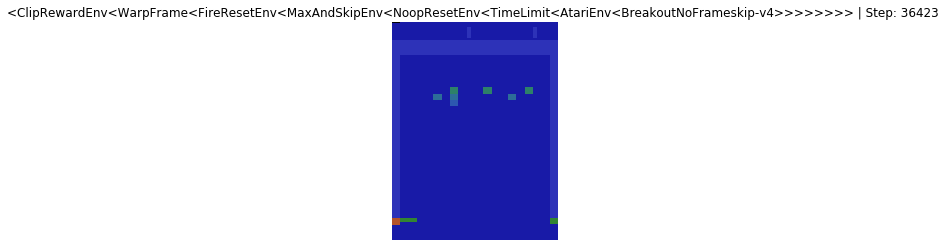

In [ ]:
env.reset()
img, _, _, _ = env.step(1)
for i in range(10): # no-op
    n_frame, _, _, _ = env.step(0)
    n_frame = fp(n_frame)
    q.append(n_frame)
show_state(env, 0)
for t in count():
  state = torch.cat(list(q))[1:].unsqueeze(0)
  action, _ = action_selector.select_action(state)
  n_frame, reward, done, info = env.step(action)
  n_frame = fp(n_frame)
  q.append(n_frame)
    
  show_state(env, t)
  
  if done:
    break

In [12]:
print(state.shape)

torch.Size([1, 4, 84, 84])
